In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
import os
import glob

path = "/Users/gadzhiev-im/Documents/projects/kp_experiments/*/report/report.xlsx"
experiments = glob.glob(path)

In [118]:
report = pd.read_excel(experiments[0], index_col=0)

In [119]:
dim = {
    'cv_catboost': "TSS CatBoost",
    'cv_lightgbm': "TSS LightGBM",
    "cv_lr": "TSS LR",
    "cv_nn_perceptron": "TSS Perceptron",
    "cv_randomforest": "TSS RF",
    "cv_smote_lr": "TSS SMOTE LR",
    "cv_smote_randomforest": "TSS SMOTE RF",
    "cv_smote_ridge": "TSS SMORE Ridge",
    "cv_xgboost": "TSS XGBoost",
    "catboost": "CatBoost",
    "lightgbm": "LightGBM",
    "lr": "LR",
    "nn_perceptron": "Perceptron",
    "randomforest": "RF",
    "ridge": "Ridge",
    "cv_ridge": "TSS Ridge",
    "smote_catboost": "SMOTE CatBoost",
    "smote_lightgbm": "SMOTE LightGBM",
    "cv_smote_catboost": "TSS SMOTE CatBoost",
    "cv_smote_lightgbm": "TSS SMOTE LightGBM",
    "smote_lr": "SMOTE LR",
    "smote_randomforest": "SMOTE RF",
    "smote_ridge": "SMOTE Ridge",
    "xgboost": "XGBoost",
    "columnestimator": "TM",
    "nn_gru": "GRU",
    "nn_lstm": "LSTM",
}

In [120]:

def process_report(report, mode=0):
    report = report.copy()
    report.columns = report.columns.str.extract('run_(.+)_f1', expand=False)
    report = report.sort_index(axis=1).T
    if mode == 0:
        cv = report.index[report.index.str.contains('cv_')]
        report = pd.concat([
            report.loc[cv], 
            report.drop(cv.values.tolist() + ['columnestimator'], errors=False), 
            report.loc[['columnestimator']]])
    else:
        return report
    return report

def map_color(x):
    
    codes = {
        'b': "#388BEE",
        'g': '#1DA22D',
        'r': '#D48282'
    }

    def _map(x):
        if x == 'TM':
            return codes['g']
        if x == 'dummy':
            return codes['b']
        else:
            return codes['b']
    colors = list(map(_map, x.index))
    argmax = x.values.argmax()
    if colors[argmax] != codes['g']:
        colors[argmax] = codes['r']
    
    return colors

def draw_scores(ax, scores, min_score, score_font):
    for i, score in enumerate(scores):
        ax.text(
            x=max(score / 1.5, min_score), y=i - .1, s=f'{100 * score:.1f}',
            fontdict=score_font
        )
        
def plot_report(
    report, min_x=.3, max_x=.75, labelsize=14,
    score_font={'size': 14}):

    f, ax = plt.subplots(nrows=1, ncols=report.shape[1], sharey=True)


    for i in report.columns:
        colors = map_color(report[i])
        report[i].plot.barh(ax=ax[i], color=colors)
        ax[i].axvline(report[i]['TM'], color='g', ls='--')
        ax[i].set_xlim(min_x, max_x)
        ax[i].grid()
        ax[i].set_title(f'Горизонт {i + 1}')
        draw_scores(ax[i], (report[i].values).tolist(), min_x + .02, score_font)

    f.set_figheight(len(report) * .6)
    f.set_figwidth(report.shape[1] * 2)
    ax[0].tick_params(axis='y', which='major', labelsize=labelsize)
    plt.tight_layout()
    
    return f, ax

In [121]:
df = process_report(report).drop("dummy").drop("cv_dummy")

In [122]:
mask_cv = df.index.str.contains("cv")
mask_smote = df.index.str.contains("smote")
mask_column = df.index.str.contains("column")

In [123]:
df.index = pd.Series(df.index).replace(dim).values

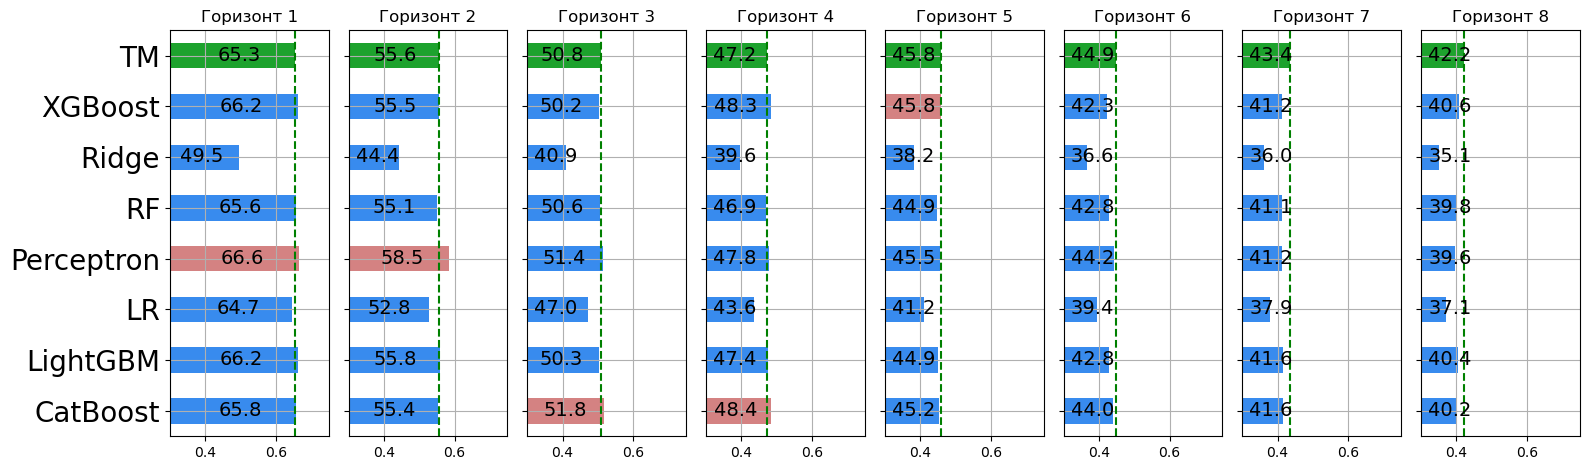

In [89]:
mask1 = ~(mask_cv | mask_smote)

f, ax = plot_report(df[mask1], labelsize=20)

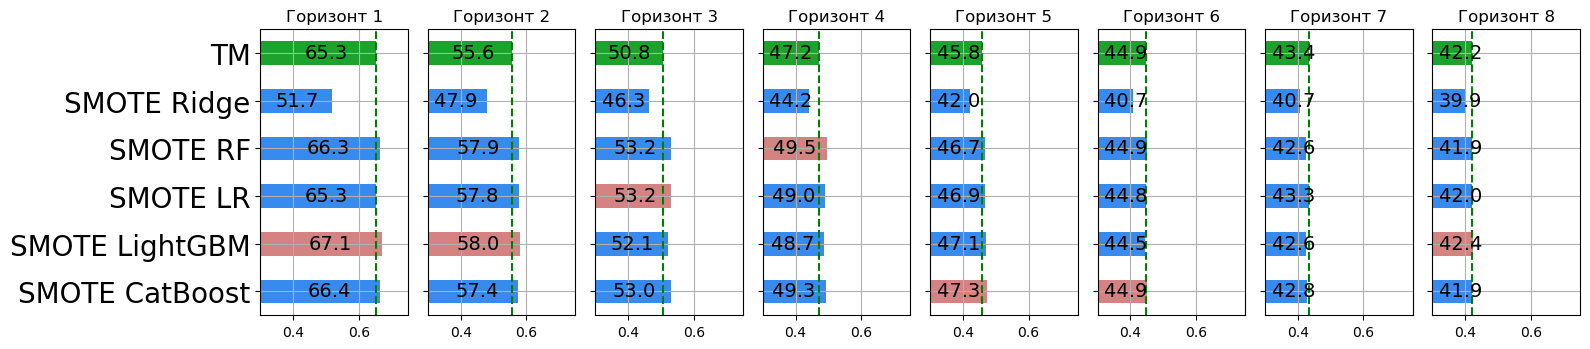

In [90]:
mask1 = ~mask_cv & (mask_column | mask_smote)

f, ax = plot_report(df[mask1], labelsize=20)

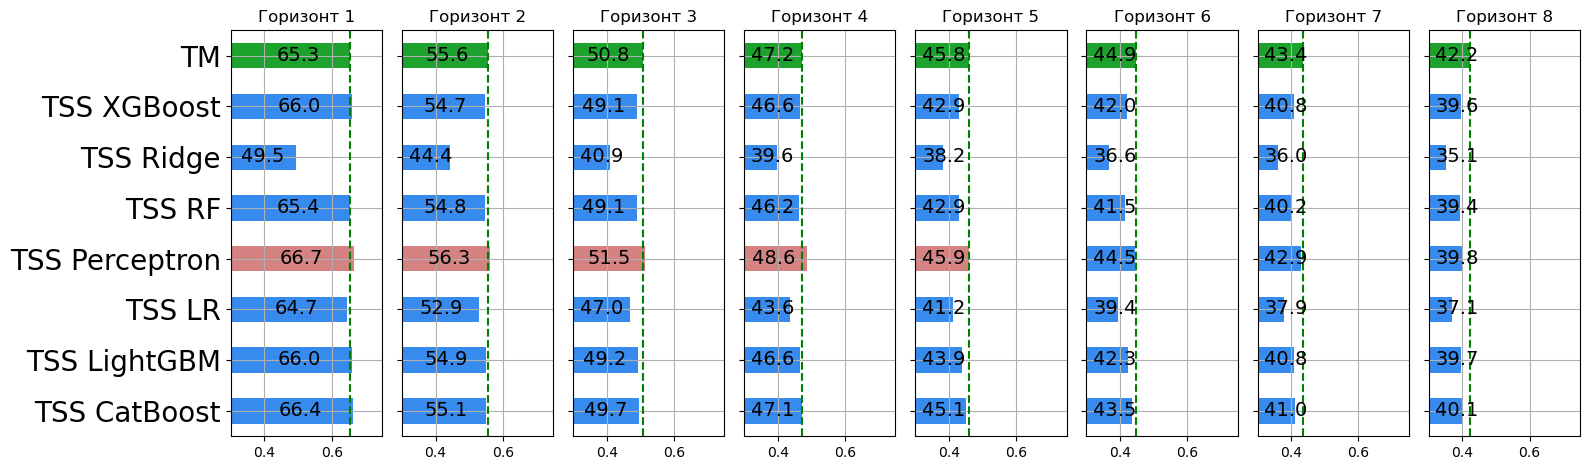

In [124]:
mask1 = ~mask_smote & (mask_column | mask_cv)

f, ax = plot_report(df[mask1], labelsize=20)

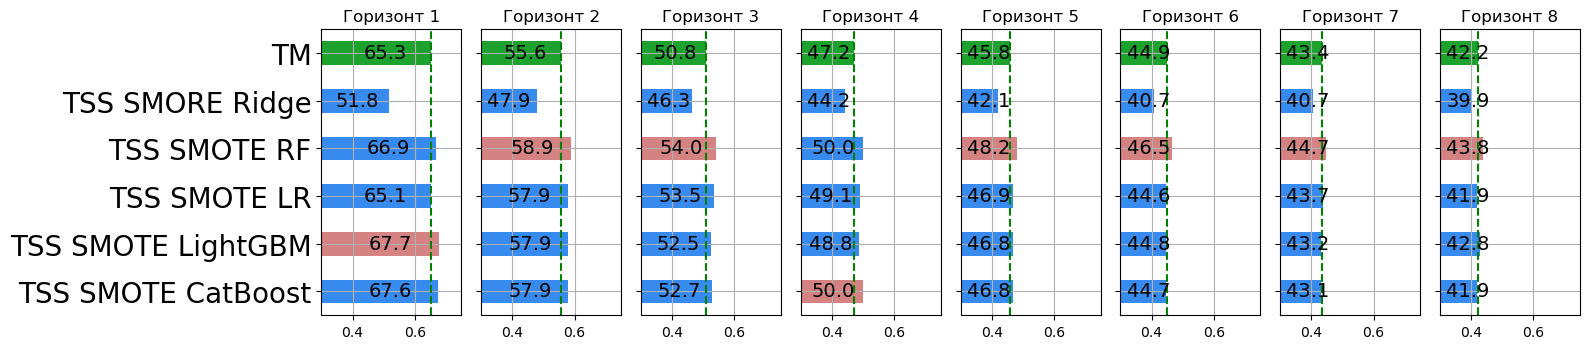

In [92]:
mask1 = (mask_smote & mask_cv) | mask_column
f, ax = plot_report(df[mask1], labelsize=20)

In [94]:
report = pd.read_excel(experiments[1], index_col=0)
df = process_report(report).drop("dummy").drop("cv_dummy")

In [97]:
mask_cv = df.index.str.contains("cv")
mask_smote = df.index.str.contains("smote")
mask_column = df.index.str.contains("column")
df.index = pd.Series(df.index).replace(dim).values

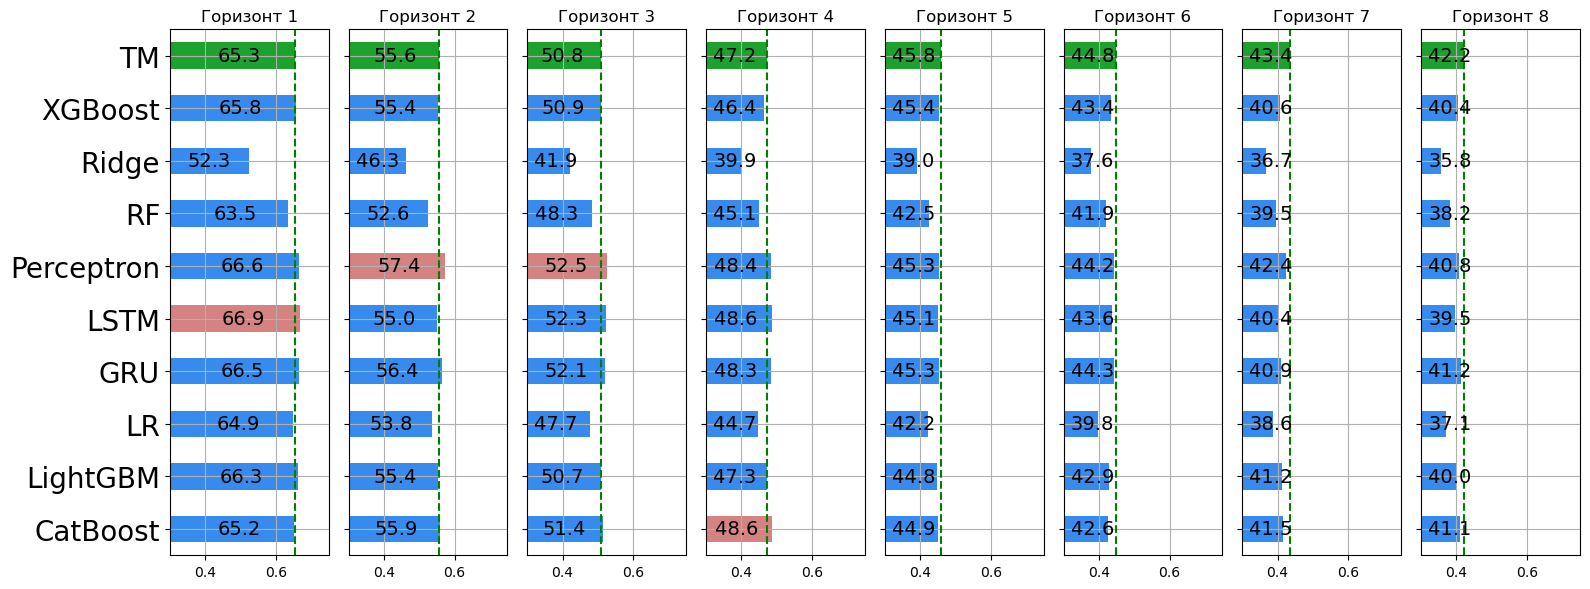

In [98]:
mask1 = ~(mask_cv | mask_smote)

f, ax = plot_report(df[mask1], labelsize=20)

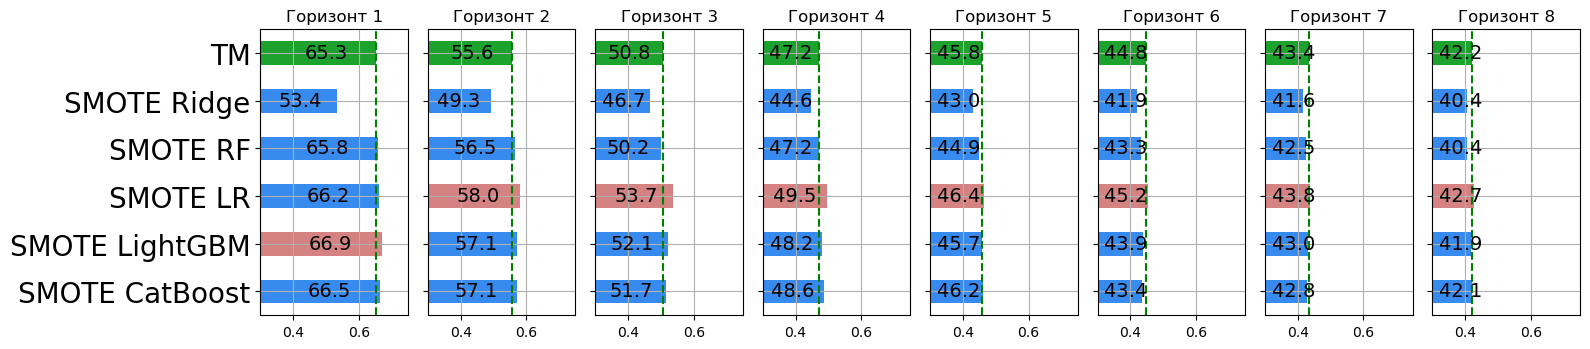

In [99]:
mask1 = ~mask_cv & (mask_column | mask_smote)

f, ax = plot_report(df[mask1], labelsize=20)

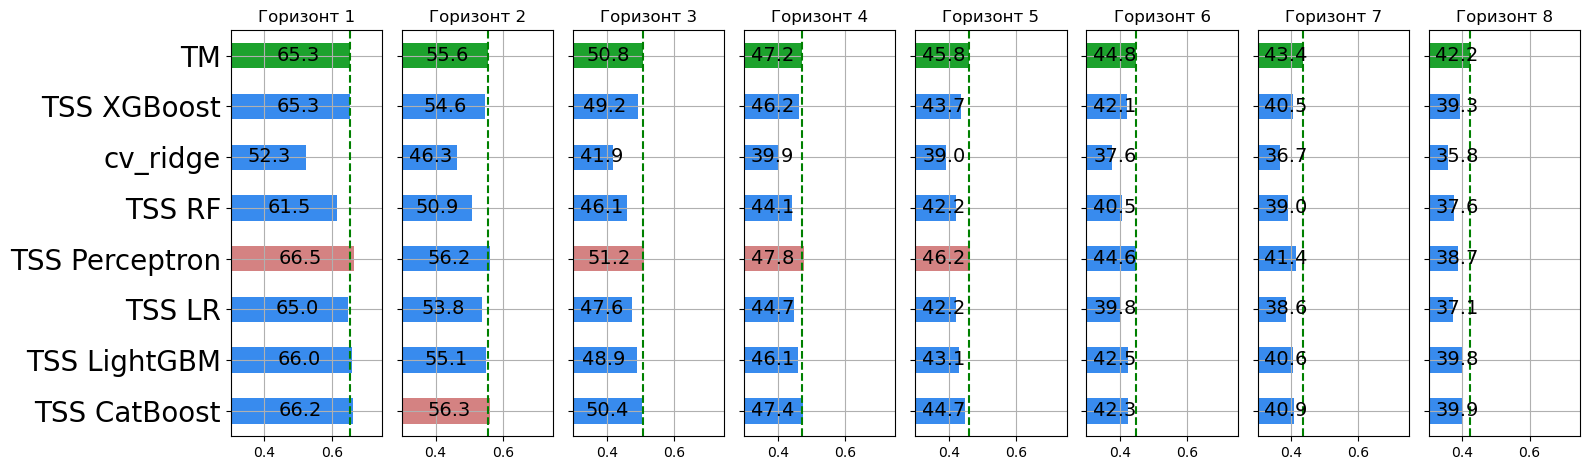

In [100]:
mask1 = ~mask_smote & (mask_column | mask_cv)

f, ax = plot_report(df[mask1], labelsize=20)

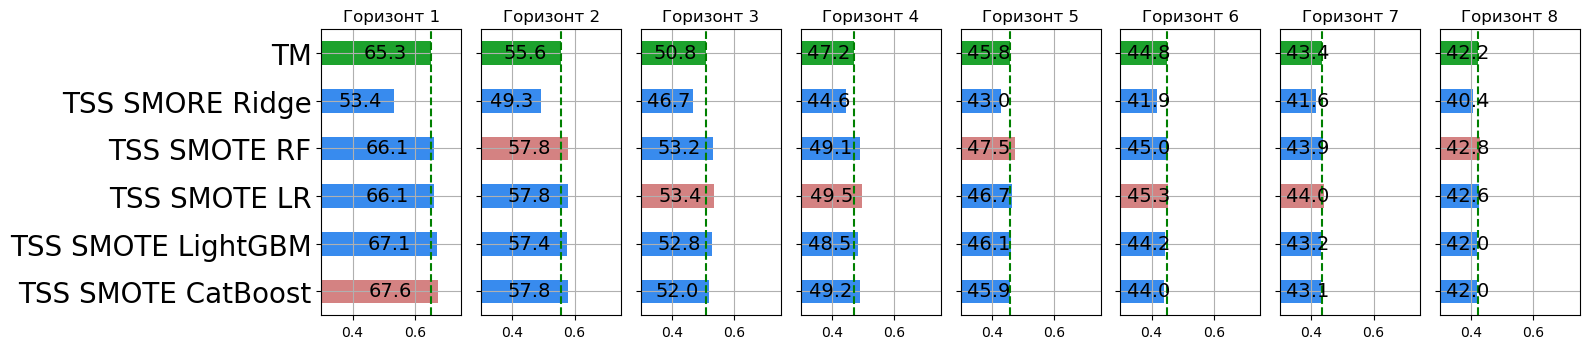

In [104]:
mask1 = (mask_smote & mask_cv) | mask_column
f, ax = plot_report(df[mask1], labelsize=20)

In [105]:
df.idxmax()

0    TSS SMOTE CatBoost
1              SMOTE LR
2              SMOTE LR
3              SMOTE LR
4          TSS SMOTE RF
5          TSS SMOTE LR
6          TSS SMOTE LR
7          TSS SMOTE RF
dtype: object

In [106]:
df.max()

0    0.675646
1    0.580452
2    0.536685
3    0.495344
4    0.475041
5    0.452768
6    0.439933
7    0.428406
dtype: float64

In [115]:
df.max()

0    0.676870
1    0.588638
2    0.539766
3    0.500075
4    0.481798
5    0.465151
6    0.447478
7    0.438354
dtype: float64

In [114]:
df.idxmax()

0    TSS SMOTE LightGBM
1          TSS SMOTE RF
2          TSS SMOTE RF
3    TSS SMOTE CatBoost
4          TSS SMOTE RF
5          TSS SMOTE RF
6          TSS SMOTE RF
7          TSS SMOTE RF
dtype: object